In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
z = pd.read_csv('BostonHousing.csv')

In [4]:
z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
z.shape

(506, 14)

In [6]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
z.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
z.duplicated().sum()

0

In [9]:
z=z.dropna()

In [10]:
'''fig , axx = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

axx= axx.flatten()
for i,col in enumerate(z.columns):
    axx[i].boxplot(z[col].dropna())
    axx[i].set_title(col)
    axx[i].set_ylabel("values")
    
plt.tight_layout()
plt.show()'''

'fig , axx = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))\n\naxx= axx.flatten()\nfor i,col in enumerate(z.columns):\n    axx[i].boxplot(z[col].dropna())\n    axx[i].set_title(col)\n    axx[i].set_ylabel("values")\n    \nplt.tight_layout()\nplt.show()'

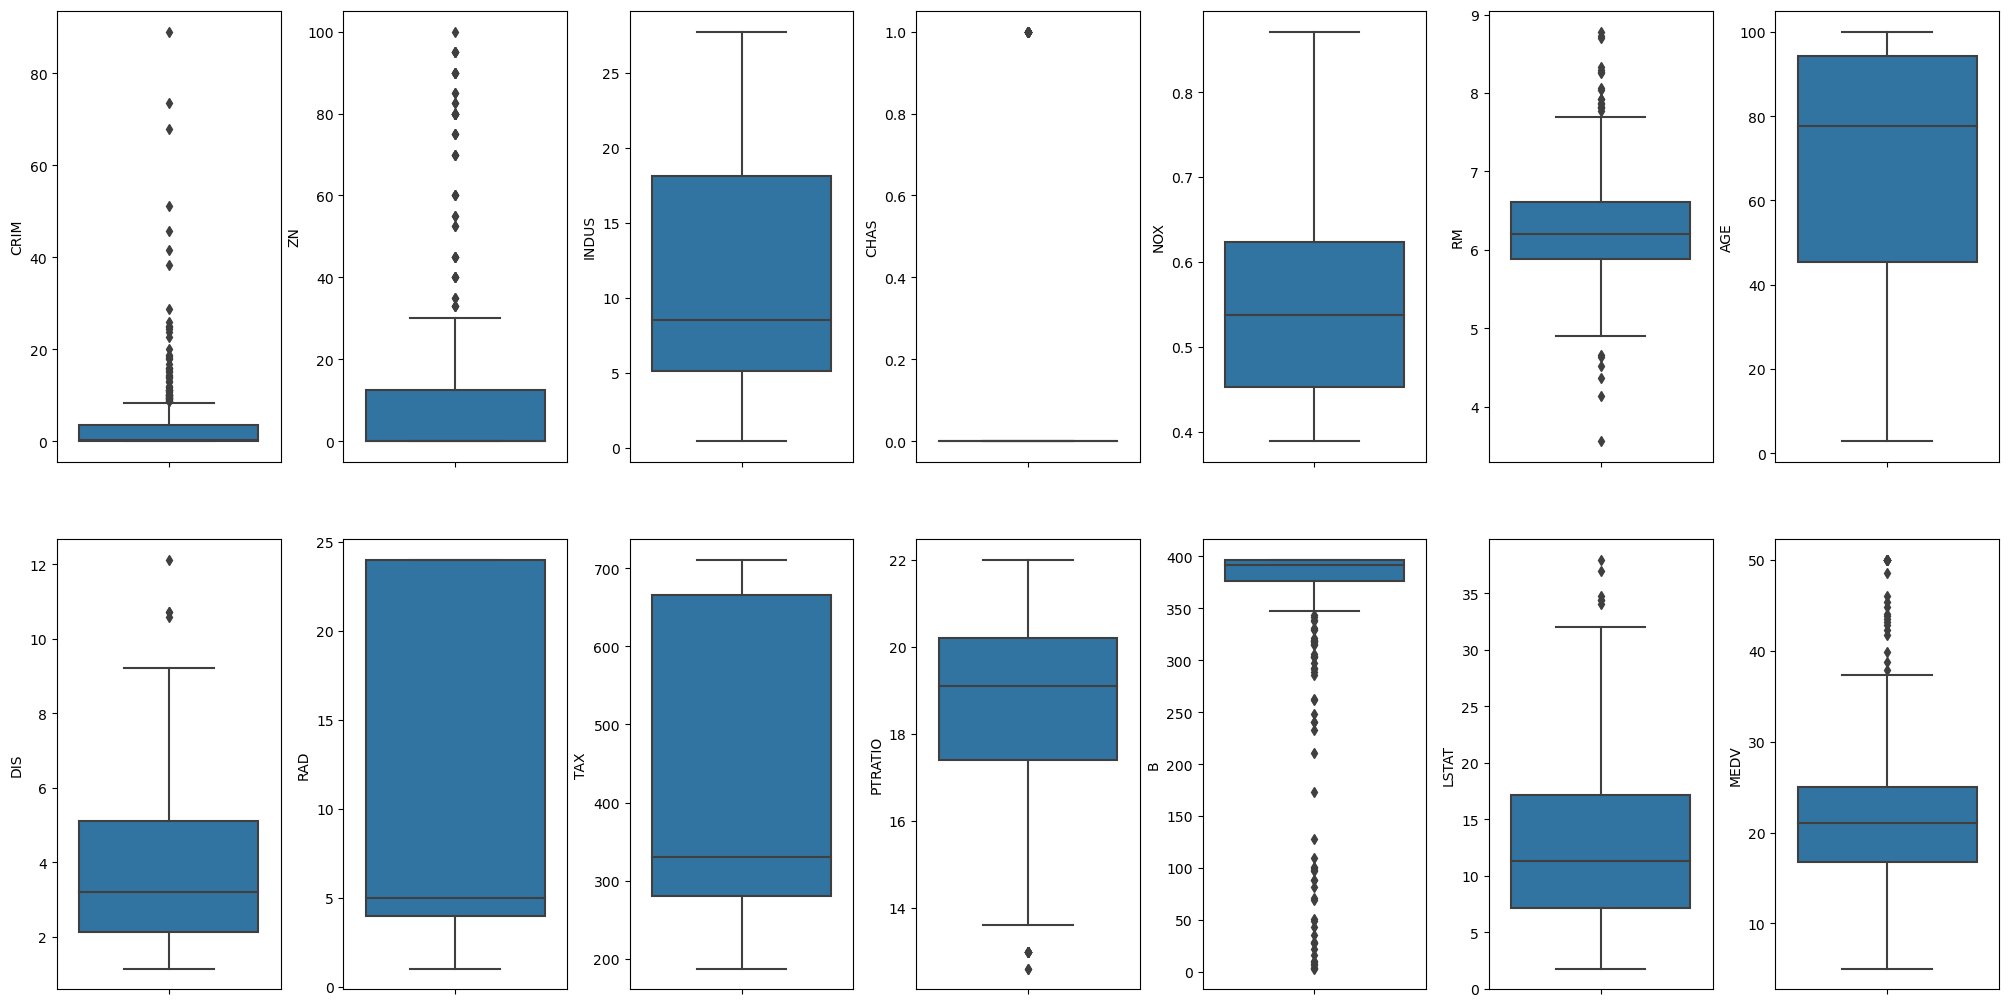

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in z.items():
    sns.boxplot(y=z[k], data=z, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
z = z[z['MEDV'] < 50.0]

In [13]:
z.shape

(382, 14)

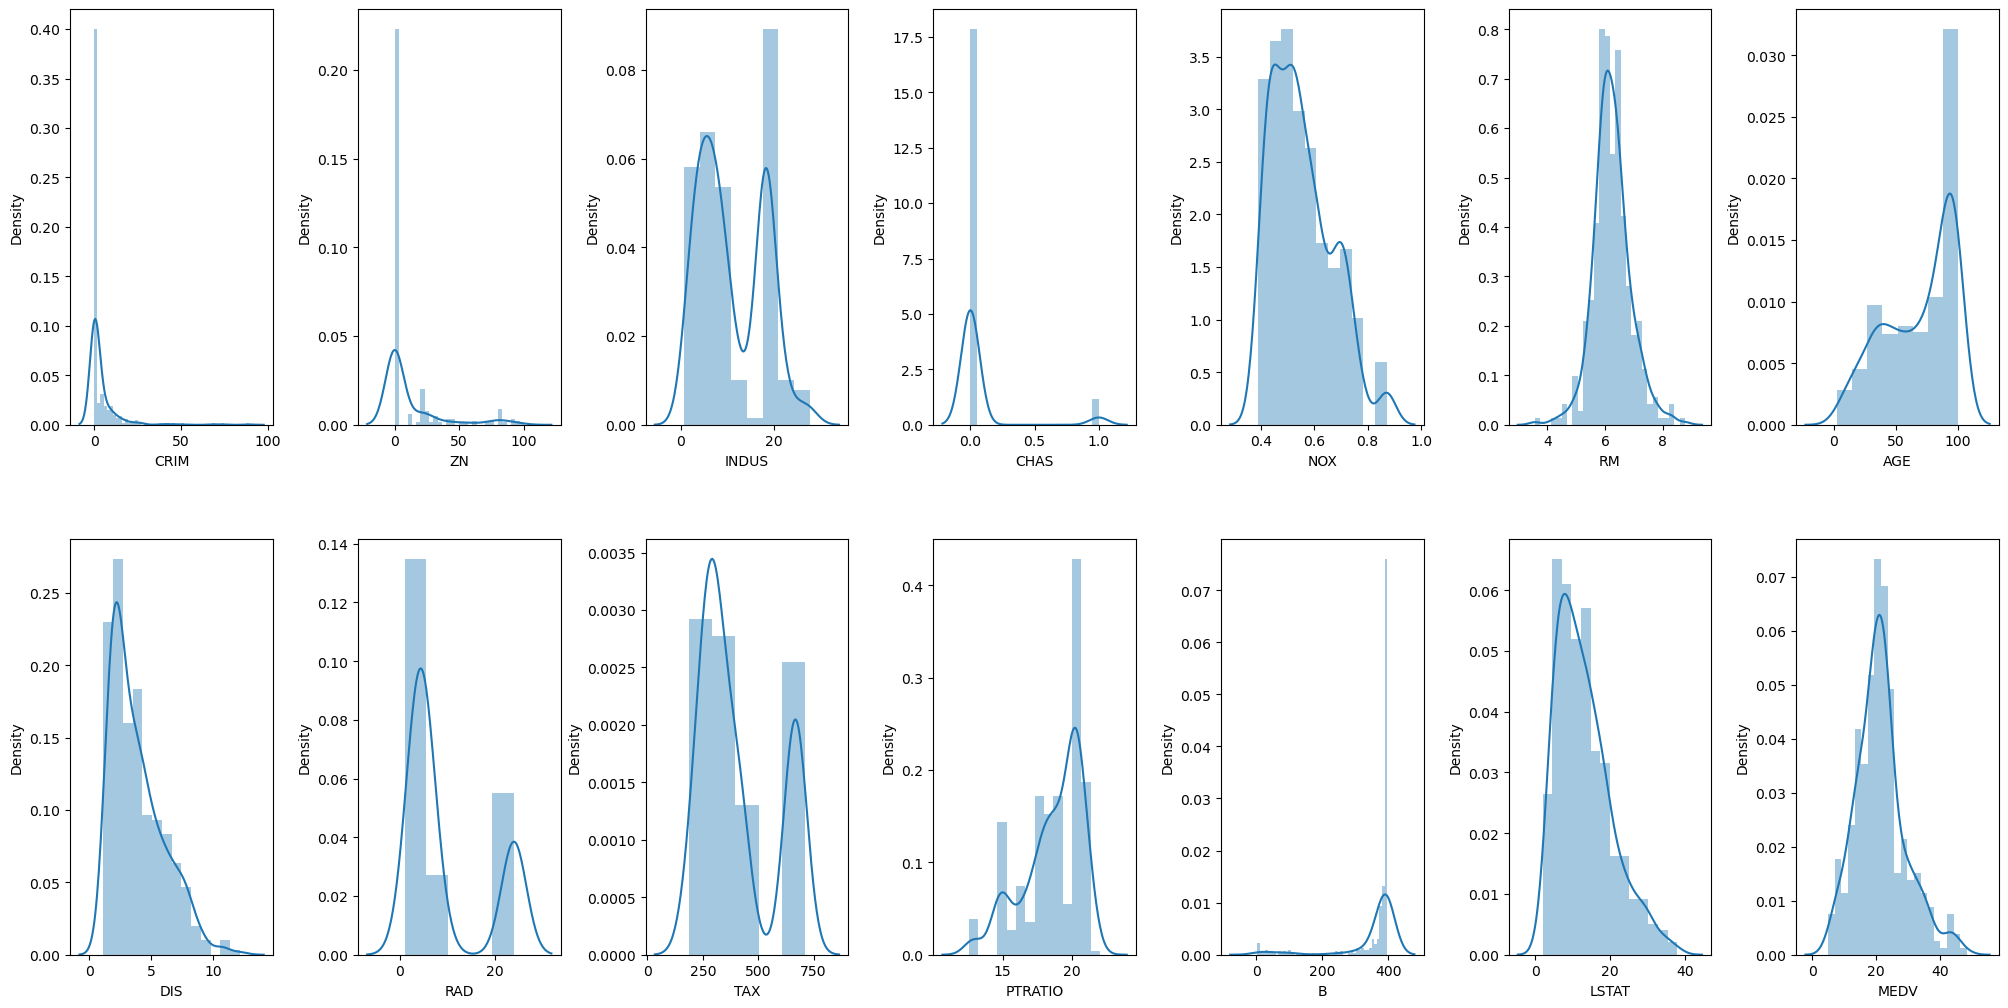

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in z.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
z.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185438,0.392234,-0.059352,0.415936,-0.228348,0.342064,-0.366969,0.608870,0.560136,0.262014,-0.385539,0.466527,-0.458223
ZN,-0.185438,1.000000,-0.510433,-0.053726,-0.509110,0.332372,-0.559080,0.655437,-0.292250,-0.289736,-0.409023,0.168613,-0.416002,0.435056
INDUS,0.392234,-0.510433,1.000000,0.034003,0.764614,-0.421118,0.636410,-0.698545,0.593715,0.732218,0.398338,-0.349173,0.623210,-0.617473
CHAS,-0.059352,-0.053726,0.034003,1.000000,0.075049,0.070086,0.067706,-0.081812,-0.005374,-0.049815,-0.100352,0.065360,0.001930,0.094635
NOX,0.415936,-0.509110,0.764614,0.075049,1.000000,-0.339522,0.728293,-0.766062,0.629553,0.679635,0.211262,-0.386969,0.611448,-0.555699
RM,-0.228348,0.332372,-0.421118,0.070086,-0.339522,1.000000,-0.278032,0.262838,-0.229706,-0.315334,-0.321057,0.113664,-0.627867,0.696463
AGE,0.342064,-0.559080,0.636410,0.067706,0.728293,-0.278032,1.000000,-0.748936,0.441043,0.499317,0.272298,-0.286133,0.629229,-0.514745
DIS,-0.366969,0.655437,-0.698545,-0.081812,-0.766062,0.262838,-0.748936,1.000000,-0.475075,-0.527770,-0.246951,0.291270,-0.537614,0.391886
RAD,0.608870,-0.292250,0.593715,-0.005374,0.629553,-0.229706,0.441043,-0.475075,1.000000,0.898879,0.433927,-0.448903,0.524151,-0.502456
TAX,0.560136,-0.289736,0.732218,-0.049815,0.679635,-0.315334,0.499317,-0.527770,0.898879,1.000000,0.437078,-0.439369,0.586547,-0.603785


In [16]:
x = z.drop('MEDV',axis = 1)

In [17]:
y = z['MEDV']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 12.985053676430278
R^2 Score: 0.8271881444861465
